# TFM Banco Checo

In [1]:
import pandas as pd
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Cargamos los datos que hemos procesado en R
df= pd.read_csv("C://Master Data Science/Master en Data Science/TFM/Transacciones de Banco Checo/DFTenenciaProductos.csv")

In [ ]:
df.head(10)

In [4]:
#Tomamos un primer subconjunto de variables de prueba
df1=df[['frequency', 'sex_owner','sex_disponent', 'Ord_Insurance','Ord_Insurance_amount','Ord_Household_Payment',
        'Ord_Household_Payment_amount','Ord_Loan_Payment','Ord_Loan_Payment_amount','Ord_Leasing','Ord_Leasing_amount',
        'Ord_Empty','Ord_Empty_amount']] 

In [5]:
df1.head()

,frequency,sex_owner,sex_disponent,Ord_Insurance,Ord_Insurance_amount,Ord_Household_Payment,Ord_Household_Payment_amount,Ord_Loan_Payment,Ord_Loan_Payment_amount,Ord_Leasing,Ord_Leasing_amount,Ord_Empty,Ord_Empty_amount
0,Monthly,M,NaN,0,0,1,6646,0,0.0,1,586.0,0,0
1,Monthly,F,NaN,0,0,1,1933,0,0.0,0,0.0,0,0
2,Monthly,F,NaN,1,528,1,236,1,4882.5,0,0.0,1,11766
3,Monthly,F,NaN,0,0,1,2111,0,0.0,0,0.0,2,15
4,Monthly,F,NaN,0,0,1,2865,0,0.0,0,0.0,0,0


In [6]:
df2=pd.get_dummies(df1)

In [59]:
df2.loc[10,:]

Ord_Insurance                      0.0
Ord_Insurance_amount               0.0
Ord_Household_Payment              1.0
Ord_Household_Payment_amount    3172.0
Ord_Loan_Payment                   0.0
Ord_Loan_Payment_amount            0.0
Ord_Leasing                        0.0
Ord_Leasing_amount                 0.0
Ord_Empty                          0.0
Ord_Empty_amount                   0.0
frequency_After_trans              0.0
frequency_Monthly                  1.0
frequency_Weekly                   0.0
sex_owner_F                        1.0
sex_owner_M                        0.0
sex_disponent_F                    0.0
sex_disponent_M                    1.0
Name: 10, dtype: float64

In [233]:
X_train.columns.values.tolist()

['Ord_Insurance',
 'Ord_Insurance_amount',
 'Ord_Household_Payment',
 'Ord_Household_Payment_amount',
 'Ord_Loan_Payment',
 'Ord_Loan_Payment_amount',
 'Ord_Leasing',
 'Ord_Leasing_amount',
 'Ord_Empty',
 'Ord_Empty_amount',
 'frequency_After_trans',
 'frequency_Monthly',
 'frequency_Weekly',
 'sex_owner_F',
 'sex_owner_M',
 'sex_disponent_F',
 'sex_disponent_M']

In [234]:
X_train.columns

Index(['Ord_Insurance', 'Ord_Insurance_amount', 'Ord_Household_Payment',
       'Ord_Household_Payment_amount', 'Ord_Loan_Payment',
       'Ord_Loan_Payment_amount', 'Ord_Leasing', 'Ord_Leasing_amount',
       'Ord_Empty', 'Ord_Empty_amount', 'frequency_After_trans',
       'frequency_Monthly', 'frequency_Weekly', 'sex_owner_F', 'sex_owner_M',
       'sex_disponent_F', 'sex_disponent_M'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# from imblearn.over_sampling import SMOTE

In [ ]:
# conda install -c glemaitre imbalanced-learn

In [10]:
#Empezamos a probar con un subconjunto de variables
X = df2

In [11]:
y = df["account_loan_bin"] 

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Para intentar hacer SMOTE
os = SMOTE(random_state=0)
columns = X_train.columns
os_X,os_y=os.fit_sample(X_train, y_train)
os_X = pd.DataFrame(data=os_X,columns=columns )
os_y= pd.DataFrame(data=os_y,columns=['account_loan_bin'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_X))
print("Number of loans=0 in oversampled data",len(os_y[os_y['account_loan_bin']==0]))
print("Number of loans=1",len(os_y[os_y['account_loan_bin']==1]))
print("Proportion of loans=0 is ",len(os_y[os_y['account_loan_bin']==0])/len(os_X))
print("Proportion of loans=1 is ",len(os_y[os_y['account_loan_bin']==1])/len(os_X))

In [179]:
clf_LR=LogisticRegression()

In [180]:
clf_LR_b=LogisticRegression(class_weight='balanced')

In [184]:
clf_LR.fit(X_train,y_train)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [186]:
clf_LR.fit(X_train,y_train).coef_

[[-5.76820282e-02  6.25917072e-05 -5.09389777e-01  5.01348447e-05
   7.14160471e+00  6.95491070e-05 -3.68972926e-05 -1.81871457e-02
  -5.07486545e-02  1.45096447e-04 -3.34814609e-01 -1.15557365e+00
  -8.78343533e-01 -1.11143881e+00 -1.25729298e+00 -4.14116260e-01
  -2.65617348e-02]]


C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [188]:
clf_LR.intercept_,clf_LR.coef_

(array([-2.36873179]),
 array([[-5.76820282e-02,  6.25917072e-05, -5.09389777e-01,
          5.01348447e-05,  7.14160471e+00,  6.95491070e-05,
         -3.68972926e-05, -1.81871457e-02, -5.07486545e-02,
          1.45096447e-04, -3.34814609e-01, -1.15557365e+00,
         -8.78343533e-01, -1.11143881e+00, -1.25729298e+00,
         -4.14116260e-01, -2.65617348e-02]]))

In [206]:
h=X_train.iloc[0, :]

In [207]:
h

Ord_Insurance                      0.0
Ord_Insurance_amount               0.0
Ord_Household_Payment              1.0
Ord_Household_Payment_amount    3386.0
Ord_Loan_Payment                   0.0
Ord_Loan_Payment_amount            0.0
Ord_Leasing                        0.0
Ord_Leasing_amount                 0.0
Ord_Empty                          0.0
Ord_Empty_amount                   0.0
frequency_After_trans              0.0
frequency_Monthly                  1.0
frequency_Weekly                   0.0
sex_owner_F                        0.0
sex_owner_M                        1.0
sex_disponent_F                    0.0
sex_disponent_M                    0.0
Name: 3707, dtype: float64

In [208]:
clf_LR.predict(h)

ValueError: Expected 2D array, got 1D array instead:
array=[0.000e+00 0.000e+00 1.000e+00 3.386e+03 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [225]:
sm.Logit?

Modelo sin sklearn

In [301]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())
y_pred = result.predict(X_test)
y_pred

         Current function value: 0.026538
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       account_loan_bin   No. Observations:                 3600
Model:                          Logit   Df Residuals:                     3584
Method:                           MLE   Df Model:                           15
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.9371
Time:                        20:06:28   Log-Likelihood:                -95.538
converged:                      False   LL-Null:                       -1520.0
                                        LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Ord_Insurance                   -0.9162      1.150     -0.797      0.426      -3.171       1.338
Ord_Insuran

C:\Users\osmaa\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


854     5.871202e-11
2560    9.861925e-01
2212    1.636605e-12
2347    4.482754e-18
1529    1.747251e-11
799     5.125797e-12
599     8.879606e-12
1246    8.641670e-01
1423    1.478035e-11
1399    9.487724e-01
2166    8.647603e-12
4443    1.659268e-11
1726    9.802246e-01
72      4.259100e-12
3387    5.914809e-17
2714    8.531445e-12
1281    3.583595e-12
4394    3.583595e-12
1953    1.179588e-11
2551    1.293921e-11
2481    3.583595e-12
2255    4.988772e-12
2103    2.023682e-11
1900    3.983751e-12
4445    1.636605e-12
2808    2.096571e-12
2101    2.475835e-20
1431    1.636605e-12
872     9.616745e-01
1493    3.571623e-12
            ...     
3718    8.324104e-12
1571    6.616416e-12
3646    2.002572e-11
2169    6.081998e-12
3727    7.376499e-12
3980    9.180836e-01
527     1.017076e-16
1914    1.495518e-11
3169    1.908290e-11
2439    6.932138e-12
1327    1.142850e-11
1974    1.931405e-11
4168    1.636605e-12
2886    1.636605e-12
1474    2.024975e-12
794     2.669373e-12
3161    3.562

In [230]:
roc_auc_score(y_true=y_test, y_score=y_pred)


NameError: name 'roc_auc_score' is not defined

In [229]:
print("El accuracy es", accuracy_score(y_test,y_pred)*100,"%")
#print("La precision es",precision_score(y_test,y_pred), "%")
#print("El recall es",recall_score(y_test,y_pred,"%")

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [236]:
from sklearn.feature_selection import RFE
rfe = RFE(clf_LR, 1)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)


C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[False False False False  True False False False False False False False
 False False False False False]
[ 9 14  8 16  1 15 17 12 11 13  7  4  5  3  2  6 10]


C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [224]:
RFE?

In [181]:
#Modelo con clases balanceadas
clf_LR_b.fit(X_train,y_train)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [182]:
#Modelo con clases balanceadas
print("El accuracy es",accuracy_score(y_train,clf_LR_b.predict(X_train))*100,"%")
print("La precision es",precision_score(y_train,clf_LR_b.predict(X_train))*100, "%")
print("El recall es",recall_score(y_train,clf_LR_b.predict(X_train))*100,"%")

El accuracy es 99.25 %
La precision es 95.22968197879858 %
El recall es 100.0 %


In [159]:
#Predicción en el conjunto de train con Regresión Logística
print("El accuracy es",accuracy_score(y_train,clf_LR.predict(X_train))*100,"%")
print("La precision es",precision_score(y_train,clf_LR.predict(X_train))*100, "%")
print("El recall es",recall_score(y_train,clf_LR.predict(X_train))*100,"%")

El accuracy es 99.25 %
La precision es 95.22968197879858 %
El recall es 100.0 %


In [160]:
#Predicción en el conjunto de test con Regresión Logística
print("El accuracy es",accuracy_score(y_test,clf_LR.predict(X_test))*100,"%")
print("La precision es",precision_score(y_test,clf_LR.predict(X_test))*100, "%")
print("El recall es",recall_score(y_test,clf_LR.predict(X_test))*100,"%")

El accuracy es 99.11111111111111 %
La precision es 94.70198675496688 %
El recall es 100.0 %


In [161]:
sum(y_test),sum(clf_LR.predict(X_test))

(143, 151)

In [211]:
clf_LR.predict_proba(X_test)

array([[0.99657761, 0.00342239],
       [0.09070688, 0.90929312],
       [0.99168709, 0.00831291],
       ...,
       [0.99216787, 0.00783213],
       [0.99318722, 0.00681278],
       [0.0707957 , 0.9292043 ]])

In [210]:
y_test!=clf_LR.predict(X_test)

854     False
2560    False
2212    False
2347    False
1529    False
799     False
599     False
1246    False
1423    False
1399    False
2166    False
4443    False
1726    False
72      False
3387    False
2714    False
1281    False
4394    False
1953    False
2551    False
2481    False
2255    False
2103    False
1900    False
4445    False
2808    False
2101    False
1431    False
872     False
1493    False
        ...  
3718    False
1571    False
3646    False
2169    False
3727    False
3980    False
527     False
1914    False
3169    False
2439    False
1327    False
1974    False
4168    False
2886    False
1474    False
794     False
3161    False
3175    False
1916    False
1022    False
1519    False
1972    False
1877    False
2203    False
4312    False
3845    False
2664    False
3247    False
918     False
1412    False
Name: account_loan_bin, Length: 900, dtype: bool

In [177]:
print(classification_report(y_test,clf_LR.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       757
           1       0.95      1.00      0.97       143

   micro avg       0.99      0.99      0.99       900
   macro avg       0.97      0.99      0.98       900
weighted avg       0.99      0.99      0.99       900



In [168]:
confusion_matrix(y_test,clf_LR.predict(X_test))

array([[749,   8],
       [  0, 143]], dtype=int64)

In [171]:
tn, fp, fn, tp=confusion_matrix(y_test,clf_LR.predict(X_test)).ravel()

In [172]:
(tn, fp, fn, tp)


(749, 8, 0, 143)

In [165]:
confusion_matrix(y_train,clf_LR.predict(X_train))

array([[3034,   27],
       [   0,  539]], dtype=int64)

In [163]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

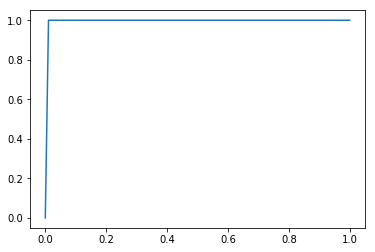

In [51]:
from sklearn.metrics import roc_curve, auc
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clf.predict(X_test))
plt.plot(fp,tp)

In [52]:
auc(fp,tp)


0.9947159841479524

In [63]:
df2.iloc[10,:]

Ord_Insurance                      0.0
Ord_Insurance_amount               0.0
Ord_Household_Payment              1.0
Ord_Household_Payment_amount    3172.0
Ord_Loan_Payment                   0.0
Ord_Loan_Payment_amount            0.0
Ord_Leasing                        0.0
Ord_Leasing_amount                 0.0
Ord_Empty                          0.0
Ord_Empty_amount                   0.0
frequency_After_trans              0.0
frequency_Monthly                  1.0
frequency_Weekly                   0.0
sex_owner_F                        1.0
sex_owner_M                        0.0
sex_disponent_F                    0.0
sex_disponent_M                    1.0
Name: 10, dtype: float64

In [247]:
print(clf.predict(df2.iloc[10,:]))
print(clf.predict_proba(df2.iloc[10,:]))

ValueError: Expected 2D array, got 1D array instead:
array=[0.000e+00 0.000e+00 1.000e+00 3.172e+03 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 1.000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Vamos a probar con un arbol de decisión 

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dfloan=df["account_loan_bin"==1]

In [97]:
clf_tree = DecisionTreeClassifier(max_depth=4)


In [99]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
accuracy_score(y_test,clf_tree.predict(X_test))

0.9888888888888889

In [101]:
sum(clf_tree.predict(X_test))

149

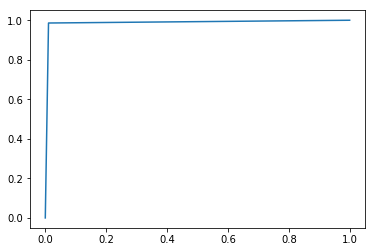

In [102]:
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clf_tree.predict(X_test))
plt.plot(fp,tp)

In [103]:
auc(fp,tp)

0.9877229771549454

In [104]:
#Vamos a ver cómo cambian los datos con CV
from sklearn.model_selection import cross_val_score


In [105]:
cross_val_score(clf,X,y,cv=5,scoring="accuracy")

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.99667037, 0.98446171, 0.99111111, 0.98887653, 0.99332592])

In [106]:
cross_val_score(clf_tree,X,y,cv=5,scoring="accuracy")

array([0.99556049, 0.98446171, 0.99111111, 0.99332592, 0.99332592])

In [109]:
# Load the library from sklearn.neighbors import KNeighborsClassifier # Create an instance regk = KNeighborsClassifier(n_neighbors=2) # Fit the data regk.fit(X,y)

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
# Load the library from sklearn.neighbors import KNeighborsClassifier # Create an instance regk = KNeighborsClassifier(n_neighbors=2) # Fit the data regk.fit(X,y)

Vamos a probar con K-Neighbors

In [110]:
from sklearn.neighbors import KNeighborsClassifier 

In [114]:
clf_knei = KNeighborsClassifier(n_neighbors=3) 

In [115]:
clf_knei.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [116]:
accuracy_score(y_test,clf_knei.predict(X_test))

0.9777777777777777

# Vamos a probar el Random Forest

In [131]:
# Load the library
from sklearn.ensemble import RandomForestClassifier
# Create an instance
clf_RF = RandomForestClassifier(max_depth=10)
# Fit the data
clf_RF.fit(X_train, y_train)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
accuracy_score(y_test,clf_RF.predict(X_test))

0.9877777777777778

In [ ]:
# Vamos a probar el Gradient Boosted

In [141]:
# Load the library
from sklearn.ensemble import GradientBoostingClassifier
# Create an instance
clf_GB = GradientBoostingClassifier(max_depth=3)
# Fit the data
clf_GB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [142]:
accuracy_score(y_test,clf_RF.predict(X_test))

0.9877777777777778

In [ ]:
from sklearn.model_selection import GridSearchCV
reg_test = GridSearchCV(KNeighborsRegressor(),
                       param_grid={"n_neighbors":np.arange(3,50)})
# Fit will test all of the combinations
reg_test.fit(X,y)

# Pruebas de distintos temas: PCA, Gráficos, HeatMap

In [238]:
import matplotlib.pyplot as plt

In [239]:
import seaborn as sns

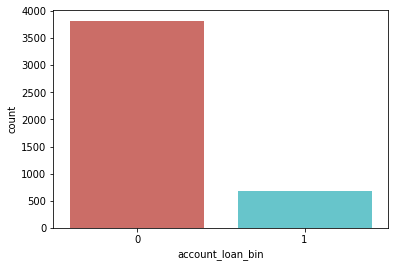

In [241]:
sns.countplot(x='account_loan_bin',data=df, palette='hls')
plt.show()

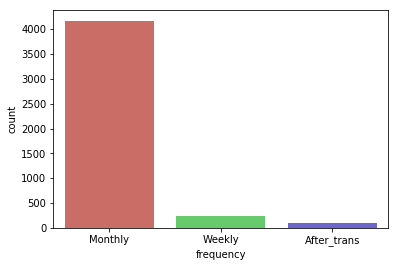

In [242]:
sns.countplot(x='frequency',data=df, palette='hls')
plt.show()

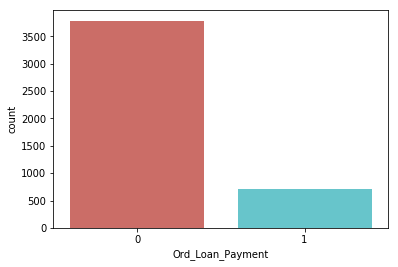

In [243]:
sns.countplot(x='Ord_Loan_Payment',data=df, palette='hls')
plt.show()

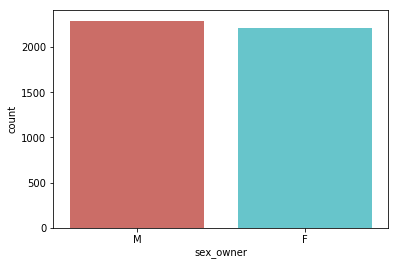

In [244]:
sns.countplot(x='sex_owner',data=df, palette='hls')
plt.show()

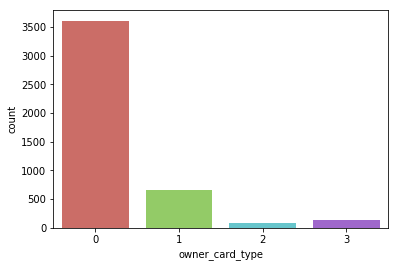

In [245]:
sns.countplot(x='owner_card_type',data=df, palette='hls')
plt.show()

In [240]:
df.columns

Index(['Unnamed: 0', 'district_id', 'account_id', 'frequency', 'Date_Account',
       'client_id_owner', 'client_id_disponent', 'sex_owner', 'birth_owner',
       'sex_disponent', 'birth_disponent', 'loan_id', 'Date_Loan',
       'Amount_Loan', 'Duration_Loan', 'Payments_Loan', 'status',
       'Status_Loan', 'Ord_Insurance', 'Ord_Insurance_amount',
       'Ord_Household_Payment', 'Ord_Household_Payment_amount',
       'Ord_Loan_Payment', 'Ord_Loan_Payment_amount', 'Ord_Leasing',
       'Ord_Leasing_amount', 'Ord_Empty', 'Ord_Empty_amount',
       'owner_card_type', 'disponent_card_type', 'owner_card_date',
       'district_name', 'region', 'num_inhabitants', 'municip < 499',
       'municip 500-1999', 'municip 2000-9999', 'municip > 10000',
       'num_cities', 'ratio_urban_inhabitants', 'avg_salary',
       'unemployment_rate_95', 'unemployment_rate_96', 'entrepreneurs',
       'crimes_95', 'crimes_96', 'crimes_95_ratio', 'crimes_96_ratio',
       'entrepreneurs_ratio', 'Num_Type_Cre

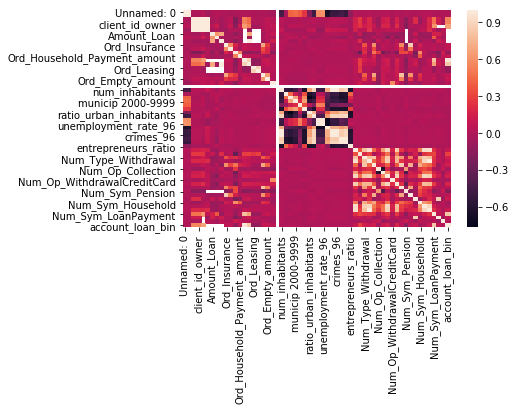

In [246]:
sns.heatmap(df.corr())
plt.show()

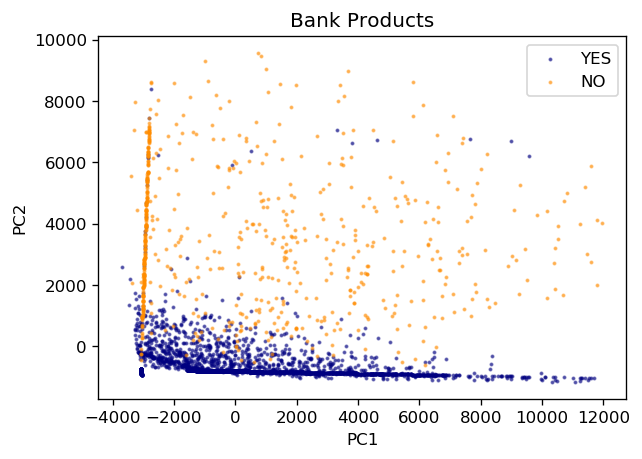

In [266]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)
plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Bank Products')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [258]:
PCA?

In [268]:
pca2 = PCA(n_components=2)
pca2.fit(X)
print(pca2.components_)
print(pca2.explained_variance_ratio_)

[[-6.13151778e-07 -1.13603261e-02  8.16961432e-05  9.98000970e-01
   8.79695090e-06  3.40516534e-02  3.54581063e-06  6.94396324e-03
  -3.01168414e-06 -5.15486716e-02  1.62312239e-06 -2.52560520e-06
   9.02482801e-07 -4.10409245e-06  4.10409245e-06  5.20420852e-06
   3.77817621e-06]
 [ 2.04700292e-05  4.71196205e-02 -2.83867573e-05 -1.84924250e-02
   1.71884066e-04  9.62853832e-01 -1.56604999e-05 -3.61482716e-02
   6.01053812e-05  2.62761367e-01  6.81310309e-06 -2.61939716e-05
   1.93808685e-05  3.26502112e-06 -3.26502112e-06  3.48462098e-06
   3.33402295e-06]]
[0.58672826 0.20731741]


# Prueba de GridSearch y Cross Validation


In [269]:
from sklearn.model_selection import cross_val_scorecross_val_score

In [278]:
cross_val_score(LogisticRegression(),X,y,cv=5,scoring="precision")

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.97857143, 0.90728477, 0.94444444, 0.97727273, 0.95774648])

In [275]:
cross_val_score?

In [276]:
from sklearn.model_selection import cross_validate


In [279]:
cross_validate(LogisticRegression(),X,y,cv=5,scoring="precision",return_train_score=True)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

{'fit_time': array([0.04521346, 0.03698158, 0.04058361, 0.0378015 , 0.04752254]),
 'score_time': array([0.        , 0.00802398, 0.        , 0.00314546, 0.0020287 ]),
 'estimator': (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False),
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False),
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False),
  

In [281]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,scoring="precision")
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("precision :",logreg_cv.best_score_)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.9531423237829683


C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [282]:
print("precision :",logreg_cv.best_estimator_)

precision : LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [287]:
logreg_cv.predict(X)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [289]:
X.head()

,Ord_Insurance,Ord_Insurance_amount,Ord_Household_Payment,Ord_Household_Payment_amount,Ord_Loan_Payment,Ord_Loan_Payment_amount,Ord_Leasing,Ord_Leasing_amount,Ord_Empty,Ord_Empty_amount,frequency_After_trans,frequency_Monthly,frequency_Weekly,sex_owner_F,sex_owner_M,sex_disponent_F,sex_disponent_M
0,0,0,1,6646,0,0.0,1,586.0,0,0,0,1,0,0,1,0,0
1,0,0,1,1933,0,0.0,0,0.0,0,0,0,1,0,1,0,0,0
2,1,528,1,236,1,4882.5,0,0.0,1,11766,0,1,0,1,0,0,0
3,0,0,1,2111,0,0.0,0,0.0,2,15,0,1,0,1,0,0,0
4,0,0,1,2865,0,0.0,0,0.0,0,0,0,1,0,1,0,0,0


In [293]:
print(logreg_cv.coef_)

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

In [297]:
print(clf_LR.coef_)

[[-5.76820282e-02  6.25917072e-05 -5.09389777e-01  5.01348447e-05
   7.14160471e+00  6.95491070e-05 -3.68972926e-05 -1.81871457e-02
  -5.07486545e-02  1.45096447e-04 -3.34814609e-01 -1.15557365e+00
  -8.78343533e-01 -1.11143881e+00 -1.25729298e+00 -4.14116260e-01
  -2.65617348e-02]]
